# analysis_d22a

### Purpose
Using Monte Carlo Drift Correction (MCDC), analyse data produced by [data_d22a.ipynb](https://github.com/grandey/d22a-mcdc/blob/main/data_d22a.ipynb), including production of figures and tables.

### Input data
NetCDF files in [data/](https://github.com/grandey/d22a-mcdc/tree/main/data/) (produced by [data_d22a.ipynb](https://github.com/grandey/d22a-mcdc/blob/main/data_d22a.ipynb)), each containing a global mean time series for a given variable, ESM variant, and CMIP6 scenario.

### Output files written
Figures (in [figs_d22a/](https://github.com/grandey/d22a-mcdc/tree/main/figs_d22a)) and tables (in [tables_d22a/](https://github.com/grandey/d22a-mcdc/tree/main/tables_d22a)).

### Author
BSG, 2023.

In [1]:
import d22a
import datetime

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Watermark, including versions of dependencies
print(d22a.get_watermark())

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.14.0

matplotlib : 3.7.2
numpy      : 1.25.1
pandas     : 2.0.3
scipy      : 1.11.1
statsmodels: 0.14.0
xarray     : 2023.6.0

conda environment: d22a-mcdc

Compiler    : Clang 15.0.7 
OS          : Darwin
Release     : 22.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [4]:
# Print constants relating to reference period, default ESM, and number of samples
for const in [d22a.REF_YRS, d22a.REF_STR, d22a.DEF_ESM, d22a.SAMPLE_N]:
    print(const)

[1850, 1859]
1850s
UKESM1-0-LL_r1i1p1f2
100


In [5]:
# Read all model data into cache at start
_ = d22a.get_cmip6_df()

get_cmip6_df(ACCESS-CM2_r1i1p1f1, piControl): shifted start year from 950 to 1850
get_cmip6_df(ACCESS-ESM1-5_r1i1p1f1, piControl): shifted start year from 101 to 1790
get_cmip6_df(CanESM5_r1i1p1f1, piControl): shifted start year from 5201 to 1850
get_cmip6_df(EC-Earth3-Veg-LR_r1i1p1f1, piControl): shifted start year from 2300 to 1850
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): shifted start year from 1850 to 1790
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): gap after 2789; using period before gap; length 1800 yr -> 1000 yr
get_cmip6_df(MIROC6_r1i1p1f1, piControl): shifted start year from 3200 to 1850
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, piControl): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, historical): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1 ssp126): shifted yr-2015 zostoga from 2.0 to 69.4 mm
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, ssp126): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f

## Main manuscript

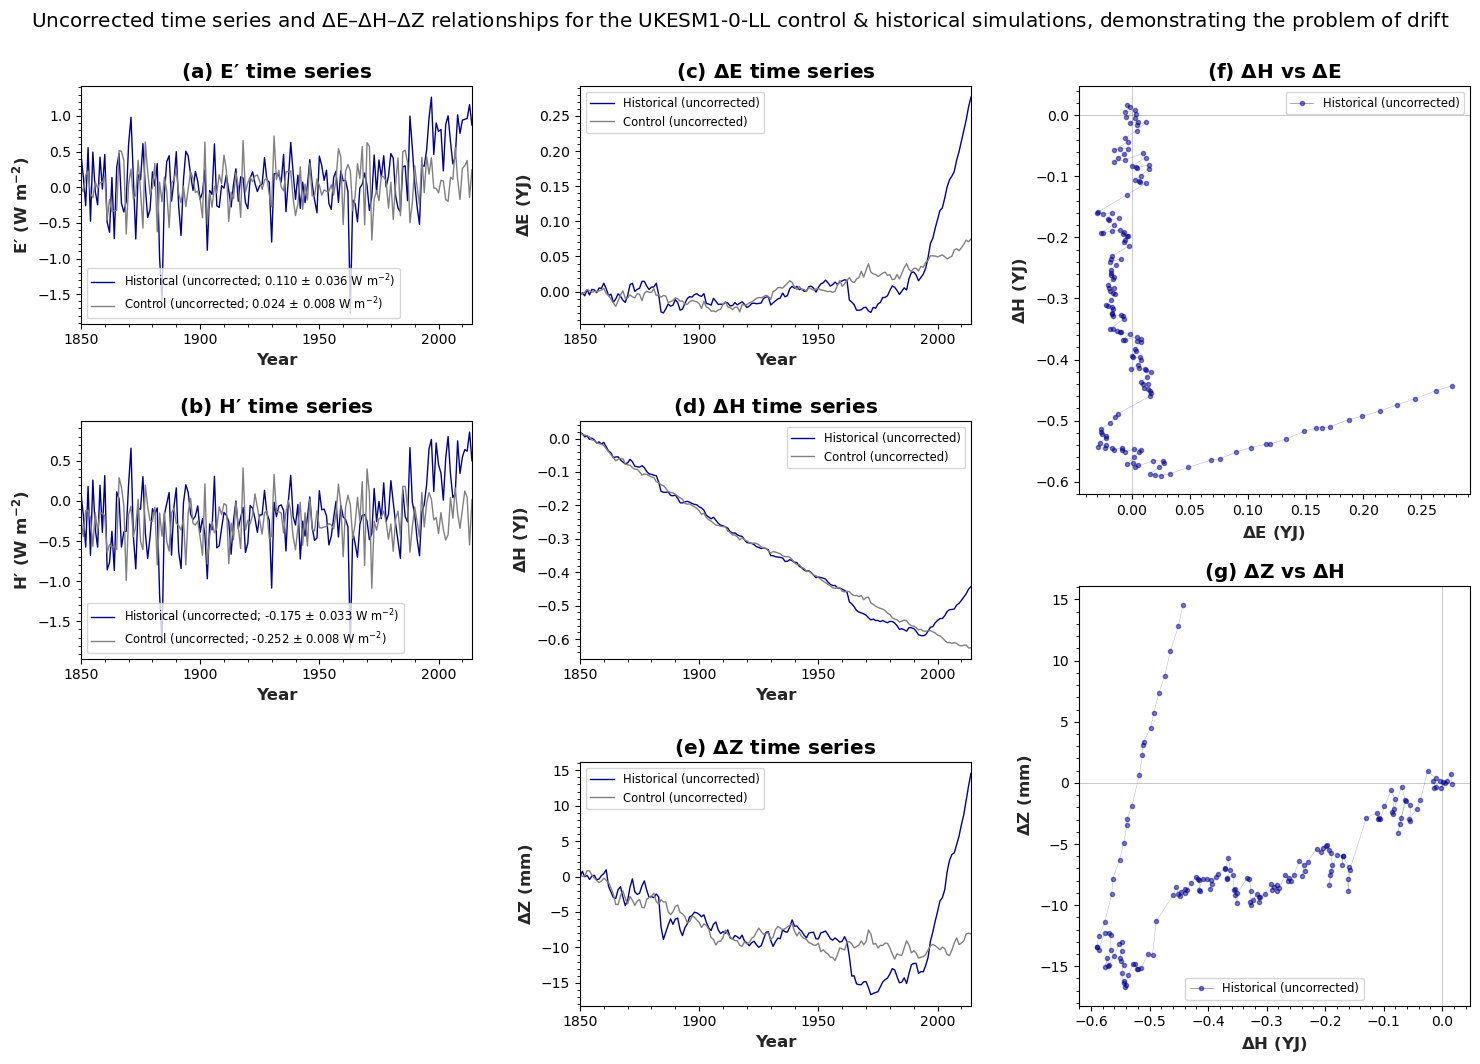

In [6]:
# Demonstrate problem of drift
fig = d22a.composite_problem_of_drift()

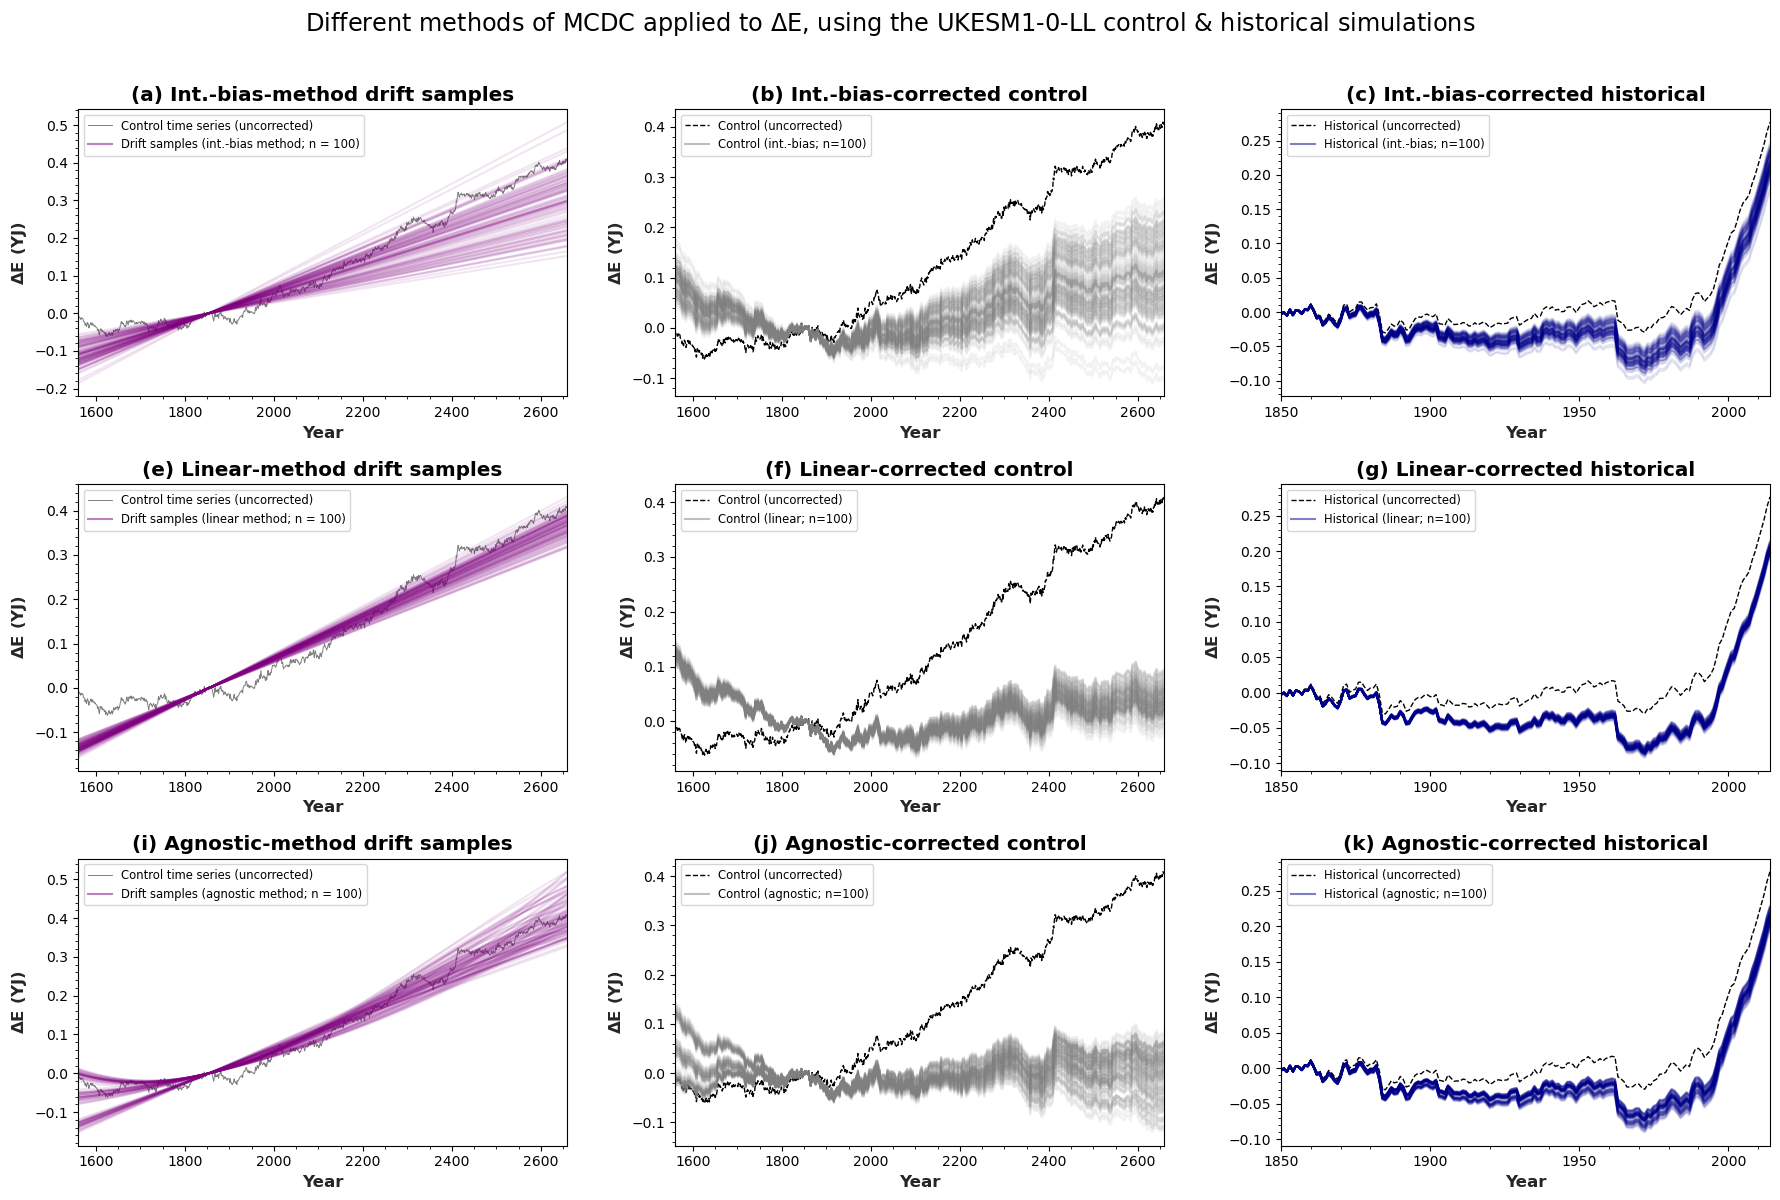

In [7]:
# Compare methods applied to E
fig = d22a.composite_compare_methods_timeseries(variable='E')

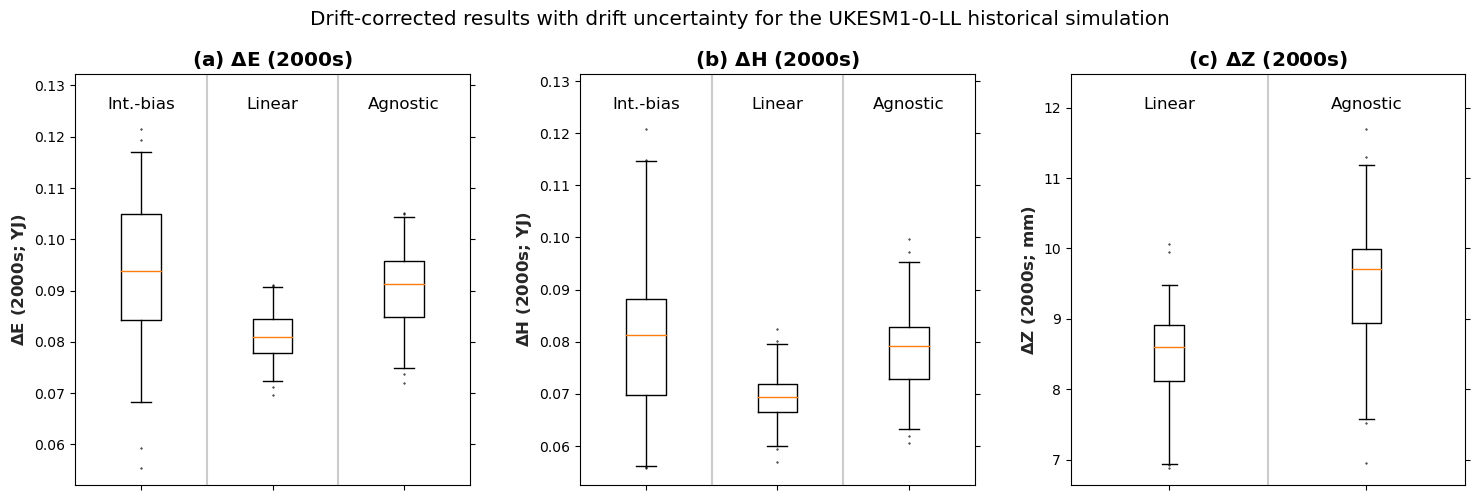

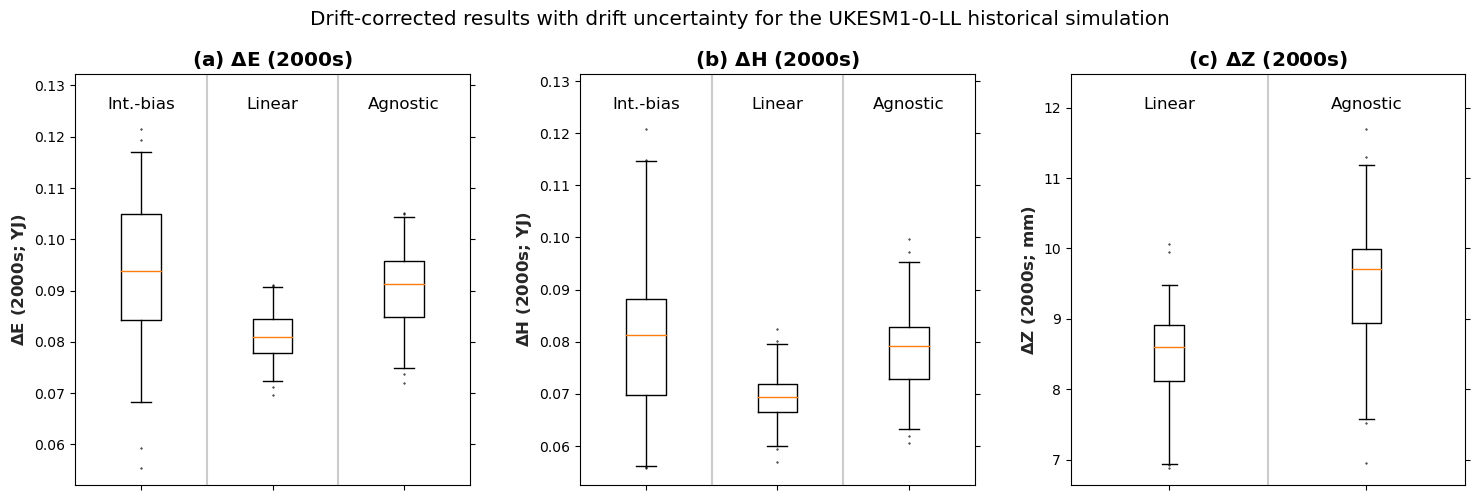

In [8]:
# Boxplots of E, H, Z for 2000s and 2050s
for target_decade in ['2000s', '2050s']:
    fig = d22a.composite_boxplots(variables=('E', 'H', 'Z'), target_decade='2000s')

In [9]:
# Summary table (across ensemble)
summary_df = d22a.get_summary_df(target_decade='2050s')
summary_df

$\Delta E$ (2050s)   $\Delta H$ (2050s)  \
Drift uncertainty Int.-bias  0.099 (0.045–0.216)  0.103 (0.039–0.206)   
                  Linear     0.026 (0.005–0.075)  0.028 (0.005–0.090)   
                  Agnostic   0.120 (0.037–0.249)  0.124 (0.040–0.253)   
Other uncertainty Model      0.746 (0.639–0.901)  0.784 (0.729–0.887)   
                  Scenario   0.177 (0.104–0.304)  0.167 (0.086–0.290)   

                            $\Delta Z$ (2050s)               $\eta$  \
Drift uncertainty Int.-bias                NaN  0.031 (0.012–0.070)   
                  Linear        3.4 (0.5–10.8)  0.009 (0.001–0.028)   
                  Agnostic     14.9 (4.2–37.4)  0.053 (0.005–0.155)   
Other uncertainty Model       82.6 (73.7–98.1)  0.173 (0.163–0.188)   
                  Scenario    21.9 (12.1–37.9)  0.022 (0.007–0.079)   

                                   $\epsilon$  
Drift uncertainty Int.-bias               NaN  
                  Linear        1.1 (0.2–3.3)  
                  Agnostic     6.7 (0.8–15.3)  
Other uncertainty Model      12.3 (11.5–13.3)  
                  Scenario      7.4 (4.1–9.9)

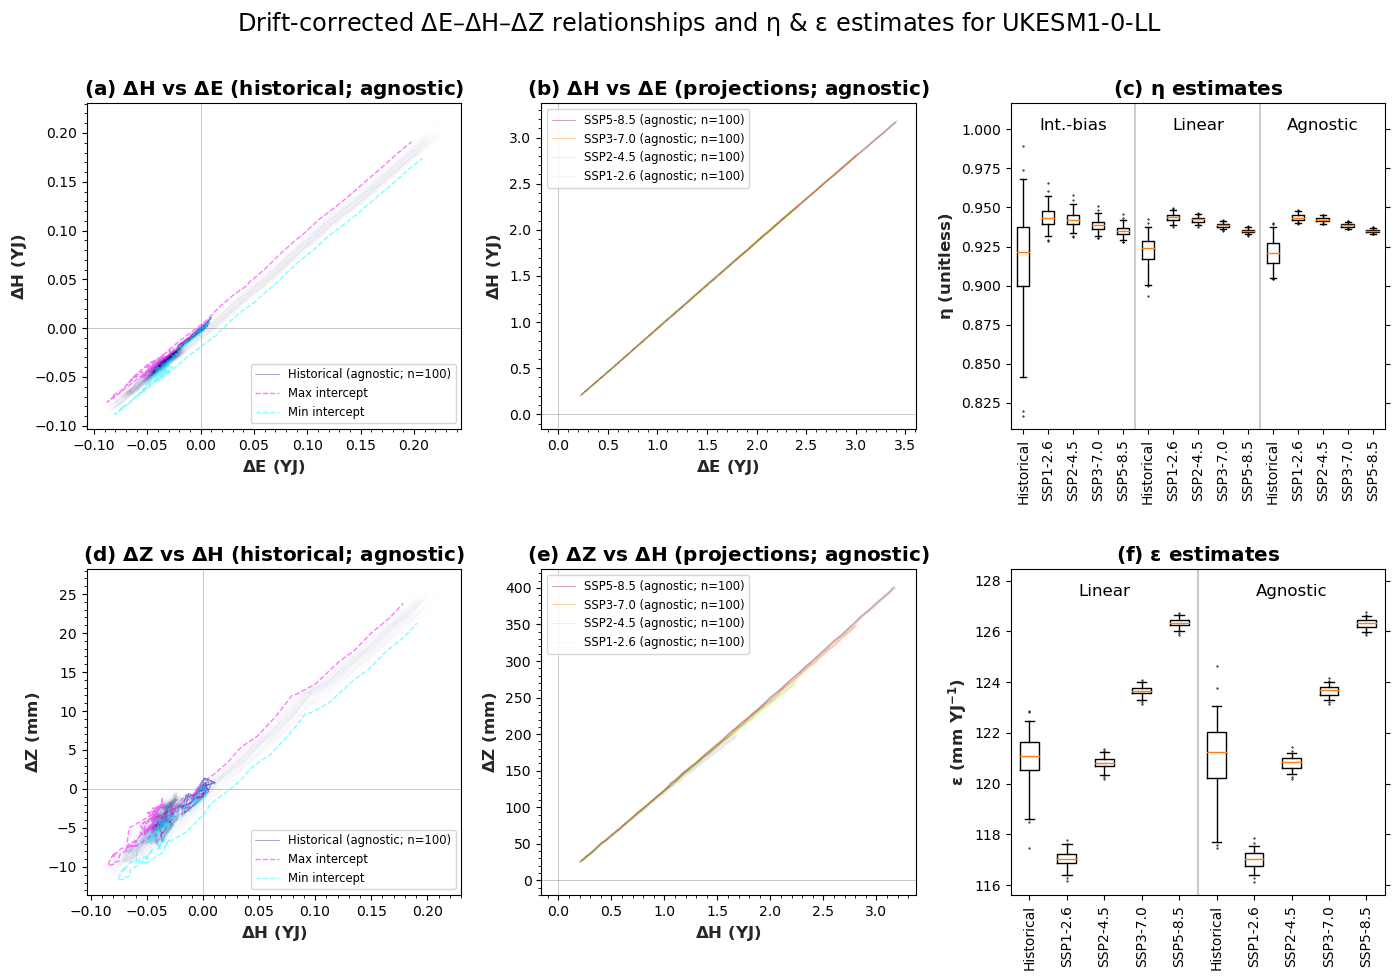

In [10]:
# Relationships, eta, eps
fig = d22a.composite_rel_eta_eps_demo()

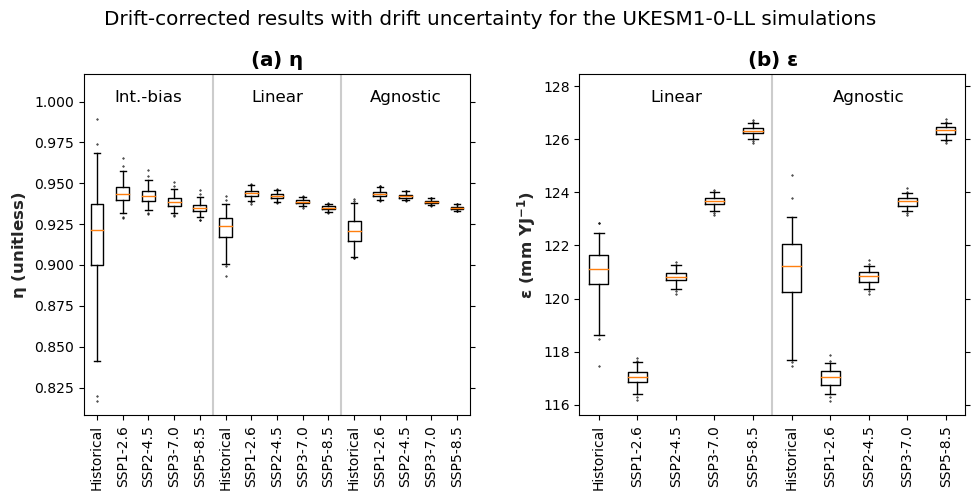

In [11]:
# Boxplots of eta, eps
fig = d22a.composite_boxplots(variables=('eta', 'eps'), target_decade=None)

## Supplement

In [12]:
# Table containing model information
info_df = d22a.get_esm_info_df()
info_df

,Variant,Control length (yr),Calendar,Further information URL
Model,,,,
ACCESS-CM2,r1i1p1f1,500,proleptic_gregorian,https://furtherinfo.es-doc.org/CMIP6.CSIRO-ARC...
ACCESS-ESM1-5,r1i1p1f1,1000,proleptic_gregorian,https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACC...
CMCC-CM2-SR5,r1i1p1f1,500,365_day,https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC...
CMCC-ESM2,r1i1p1f1,500,365_day,https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC...
CNRM-CM6-1,r1i1p1f2,500,gregorian,https://furtherinfo.es-doc.org/CMIP6.CNRM-CERF...
CNRM-ESM2-1,r1i1p1f2,500,gregorian,https://furtherinfo.es-doc.org/CMIP6.CNRM-CERF...
CanESM5,r1i1p1f1,1000,365_day,https://furtherinfo.es-doc.org/CMIP6.CCCma.Can...
EC-Earth3-Veg-LR,r1i1p1f1,501,proleptic_gregorian,https://furtherinfo.es-doc.org/CMIP6.EC-Earth-...
IPSL-CM6A-LR,r1i1p1f1,1000,gregorian,https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL...


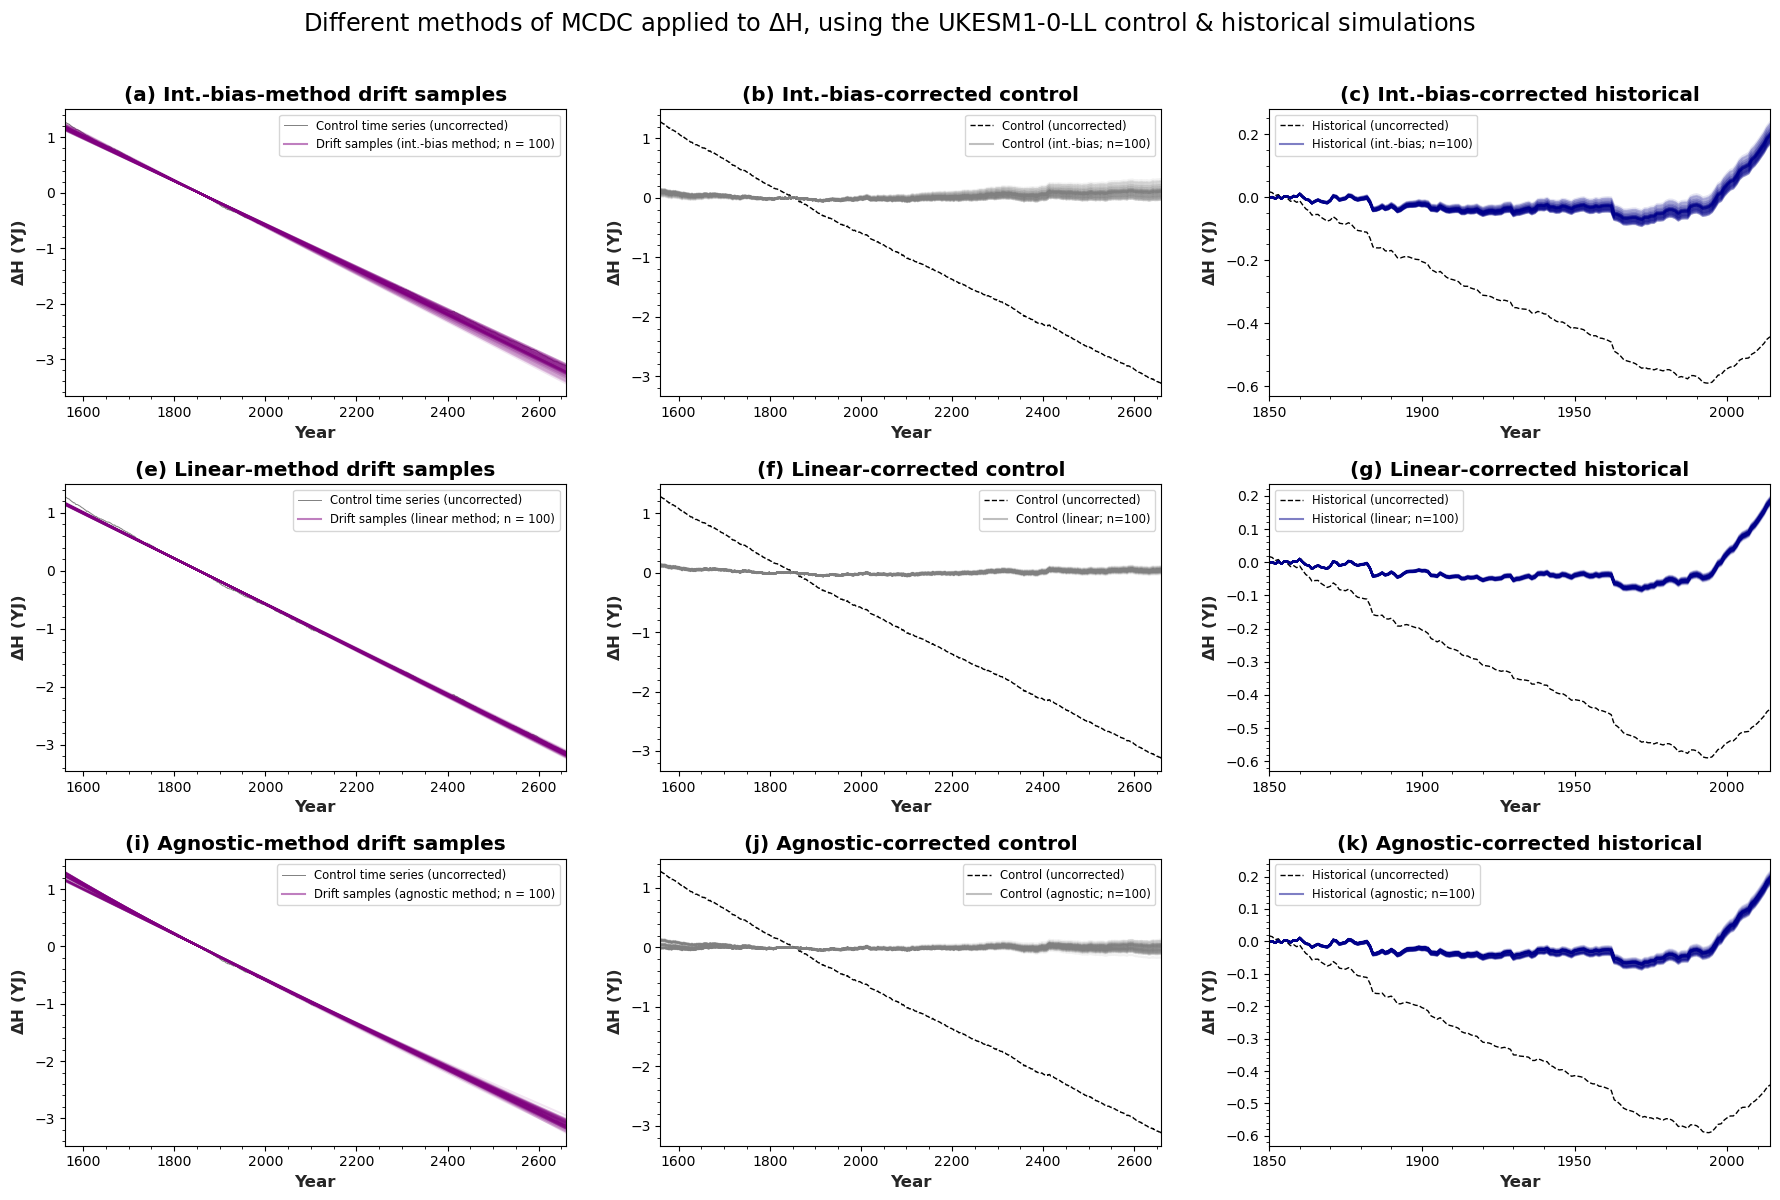

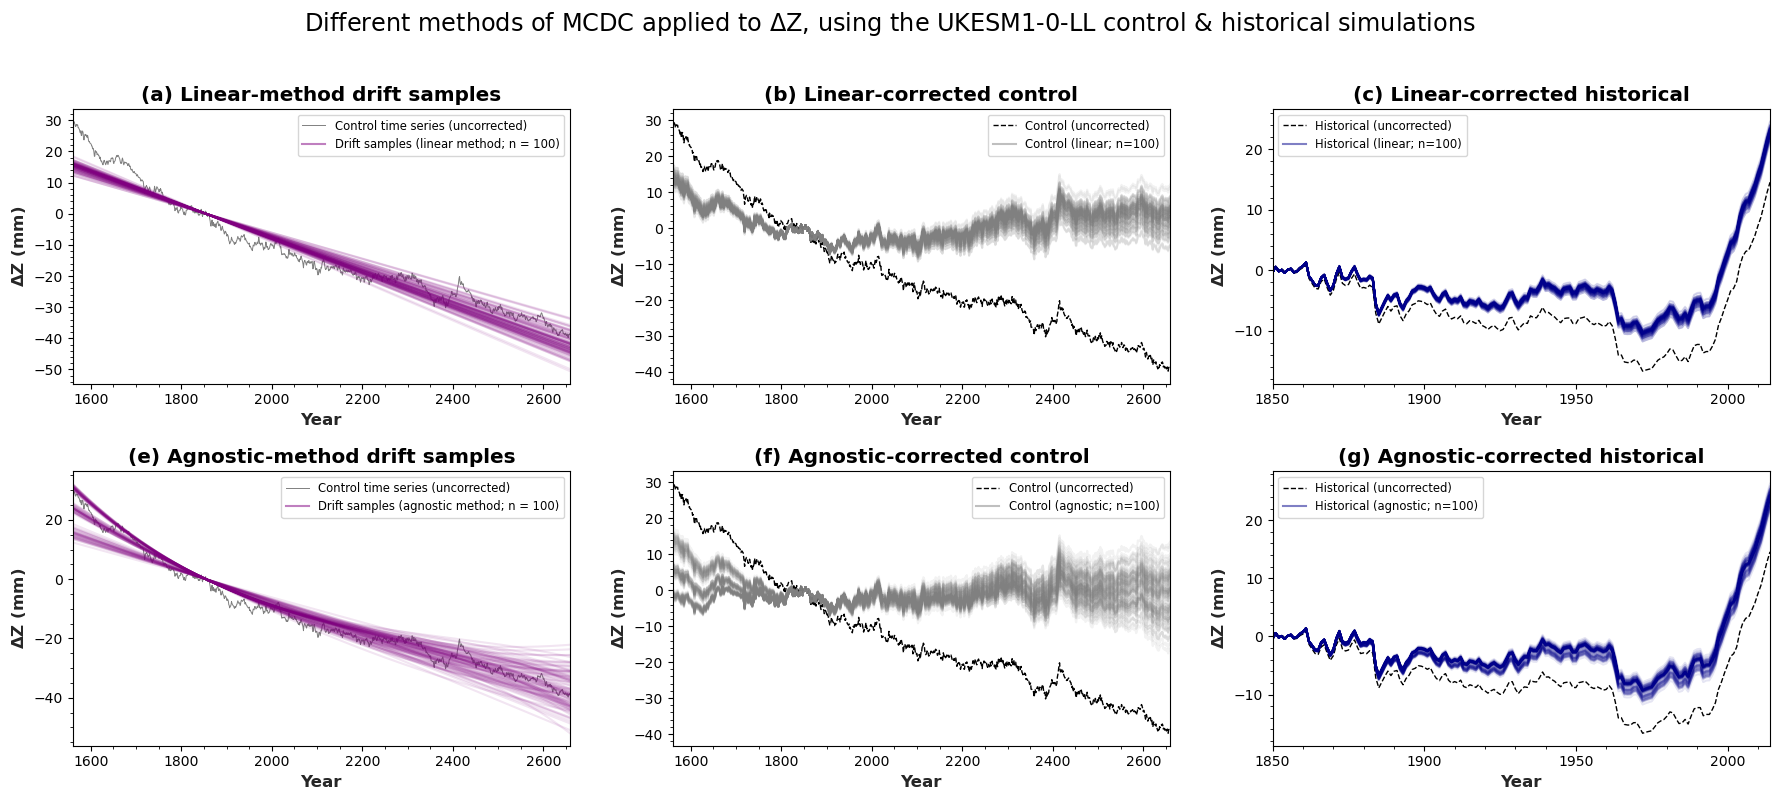

In [13]:
# Compare methods applied to H & Z
for variable in ['H', 'Z']:
    fig = d22a.composite_compare_methods_timeseries(variable=variable)

E (2050s)                  Drift uncertainty                 Other uncertainty         
                         Int.-bias Linear Agnostic             Model Scenario
ACCESS-CM2                   0.098  0.040    0.150               NaN    0.170
ACCESS-ESM1-5                0.050  0.005    0.040               NaN    0.213
CMCC-CM2-SR5                 0.216  0.069    0.163               NaN    0.184
CMCC-ESM2                    0.169  0.075    0.188               NaN    0.201
CNRM-CM6-1                   0.116  0.024    0.197               NaN    0.161
CNRM-ESM2-1                  0.162  0.035    0.203               NaN    0.104
CanESM5                      0.045  0.009    0.062               NaN    0.304
EC-Earth3-Veg-LR             0.158  0.036    0.249               NaN    0.160
IPSL-CM6A-LR                 0.113  0.022    0.061               NaN    0.195
MIROC6                       0.053  0.012    0.067               NaN    0.163
MPI-ESM1-2-HR                0.104  0.020    0.169    

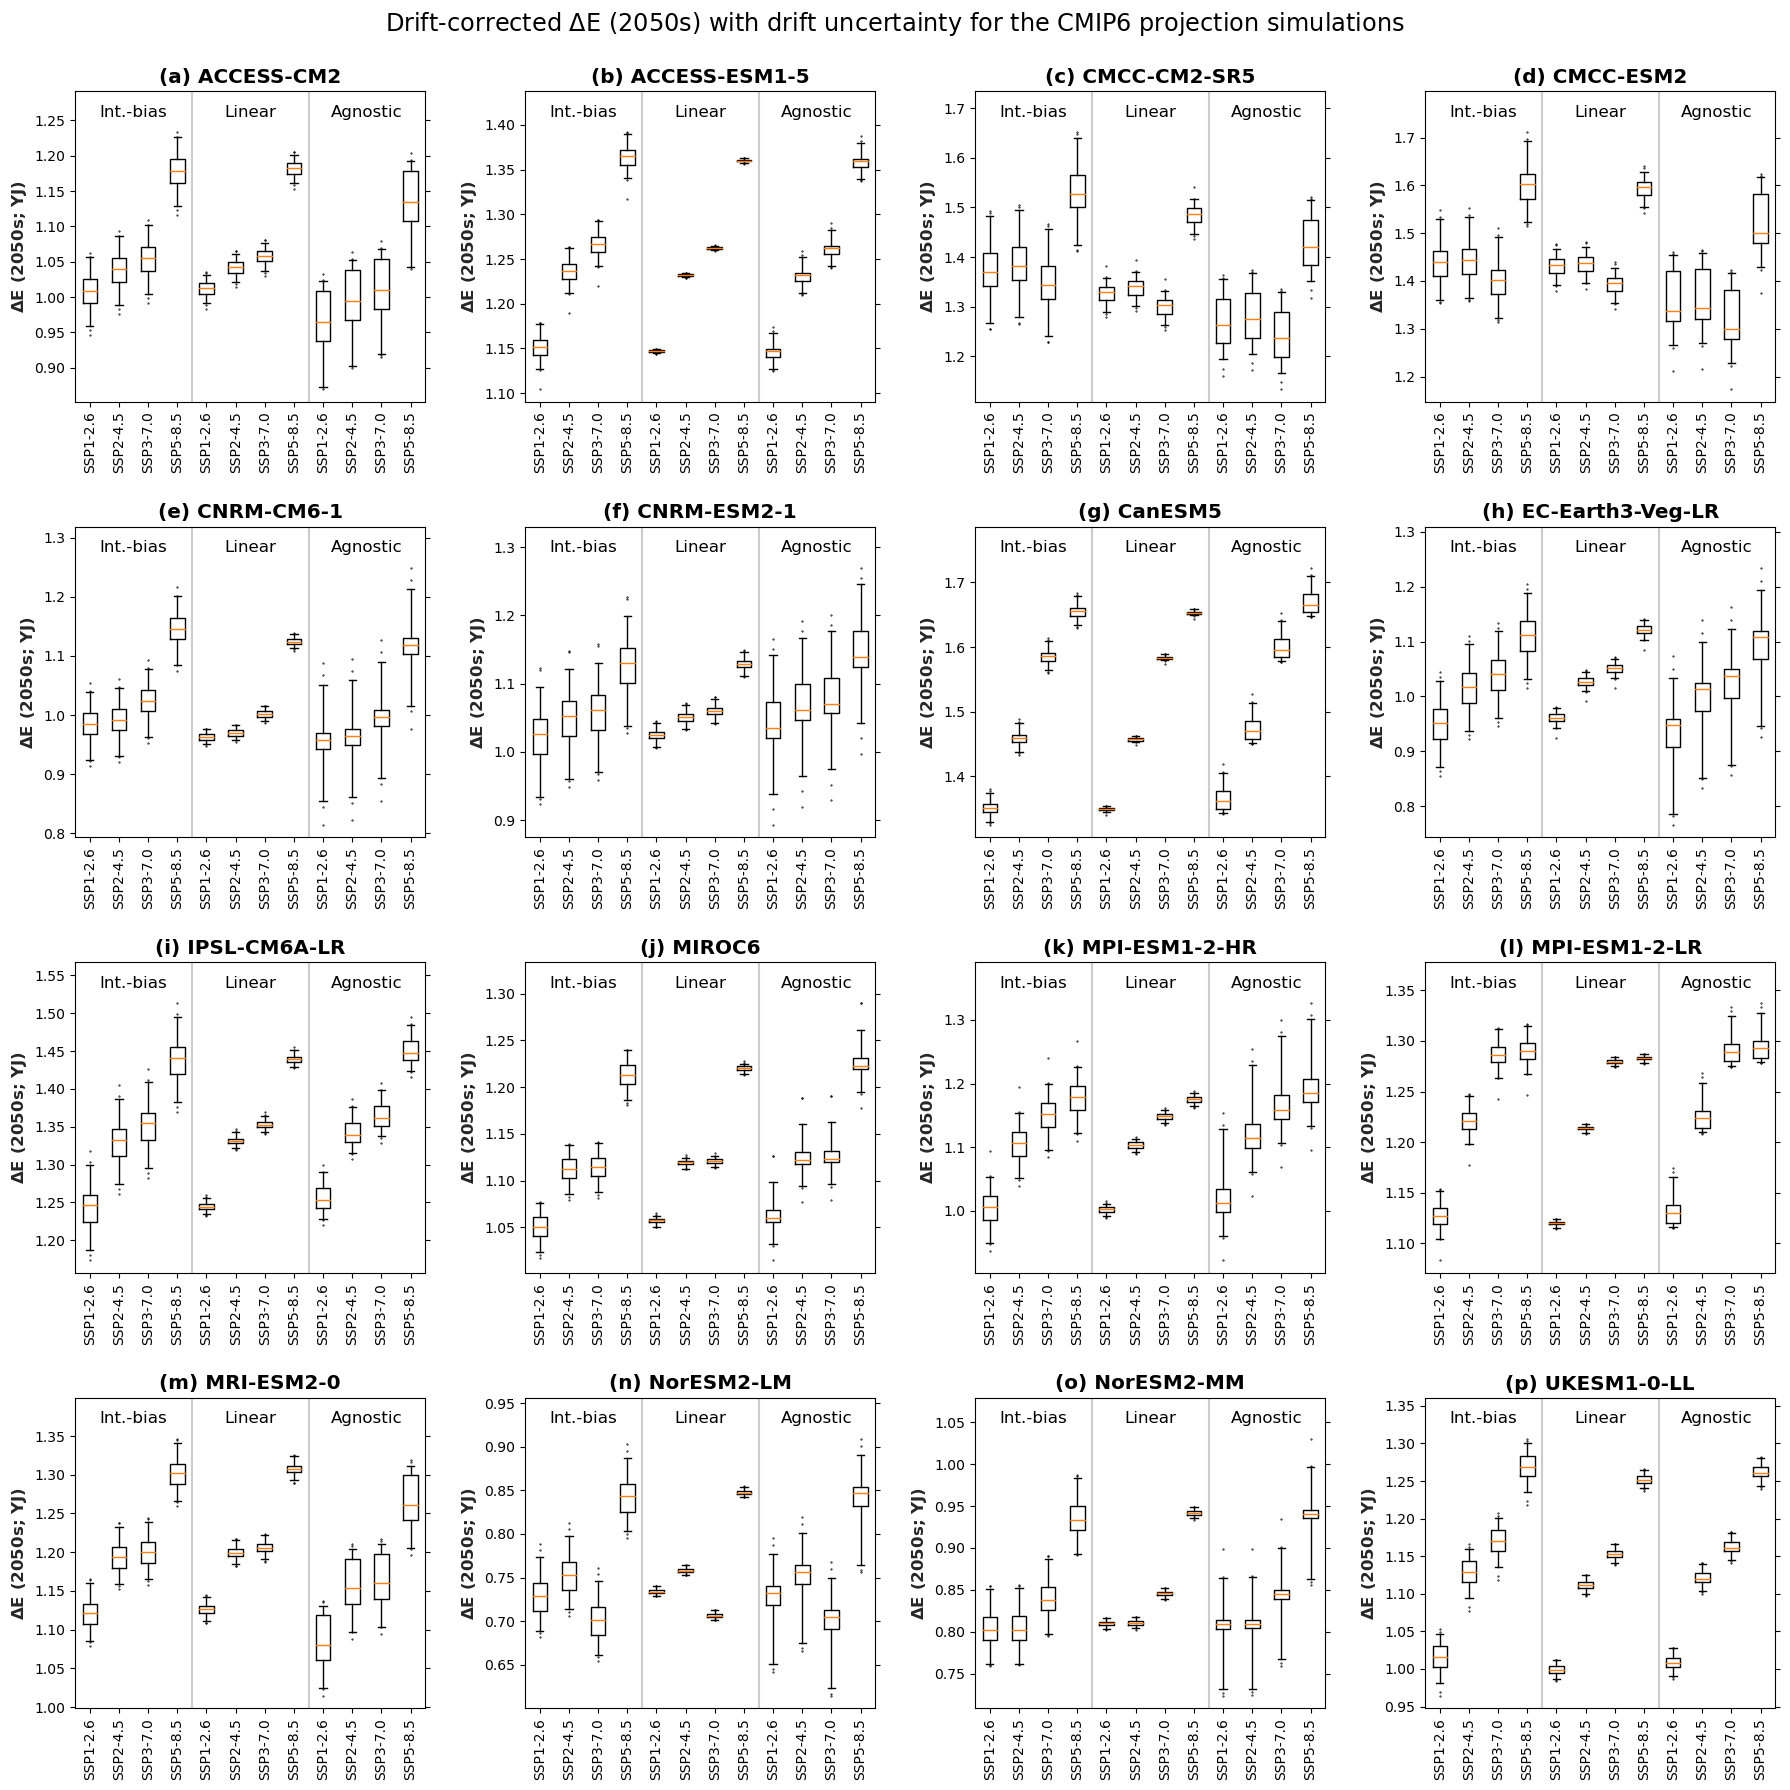

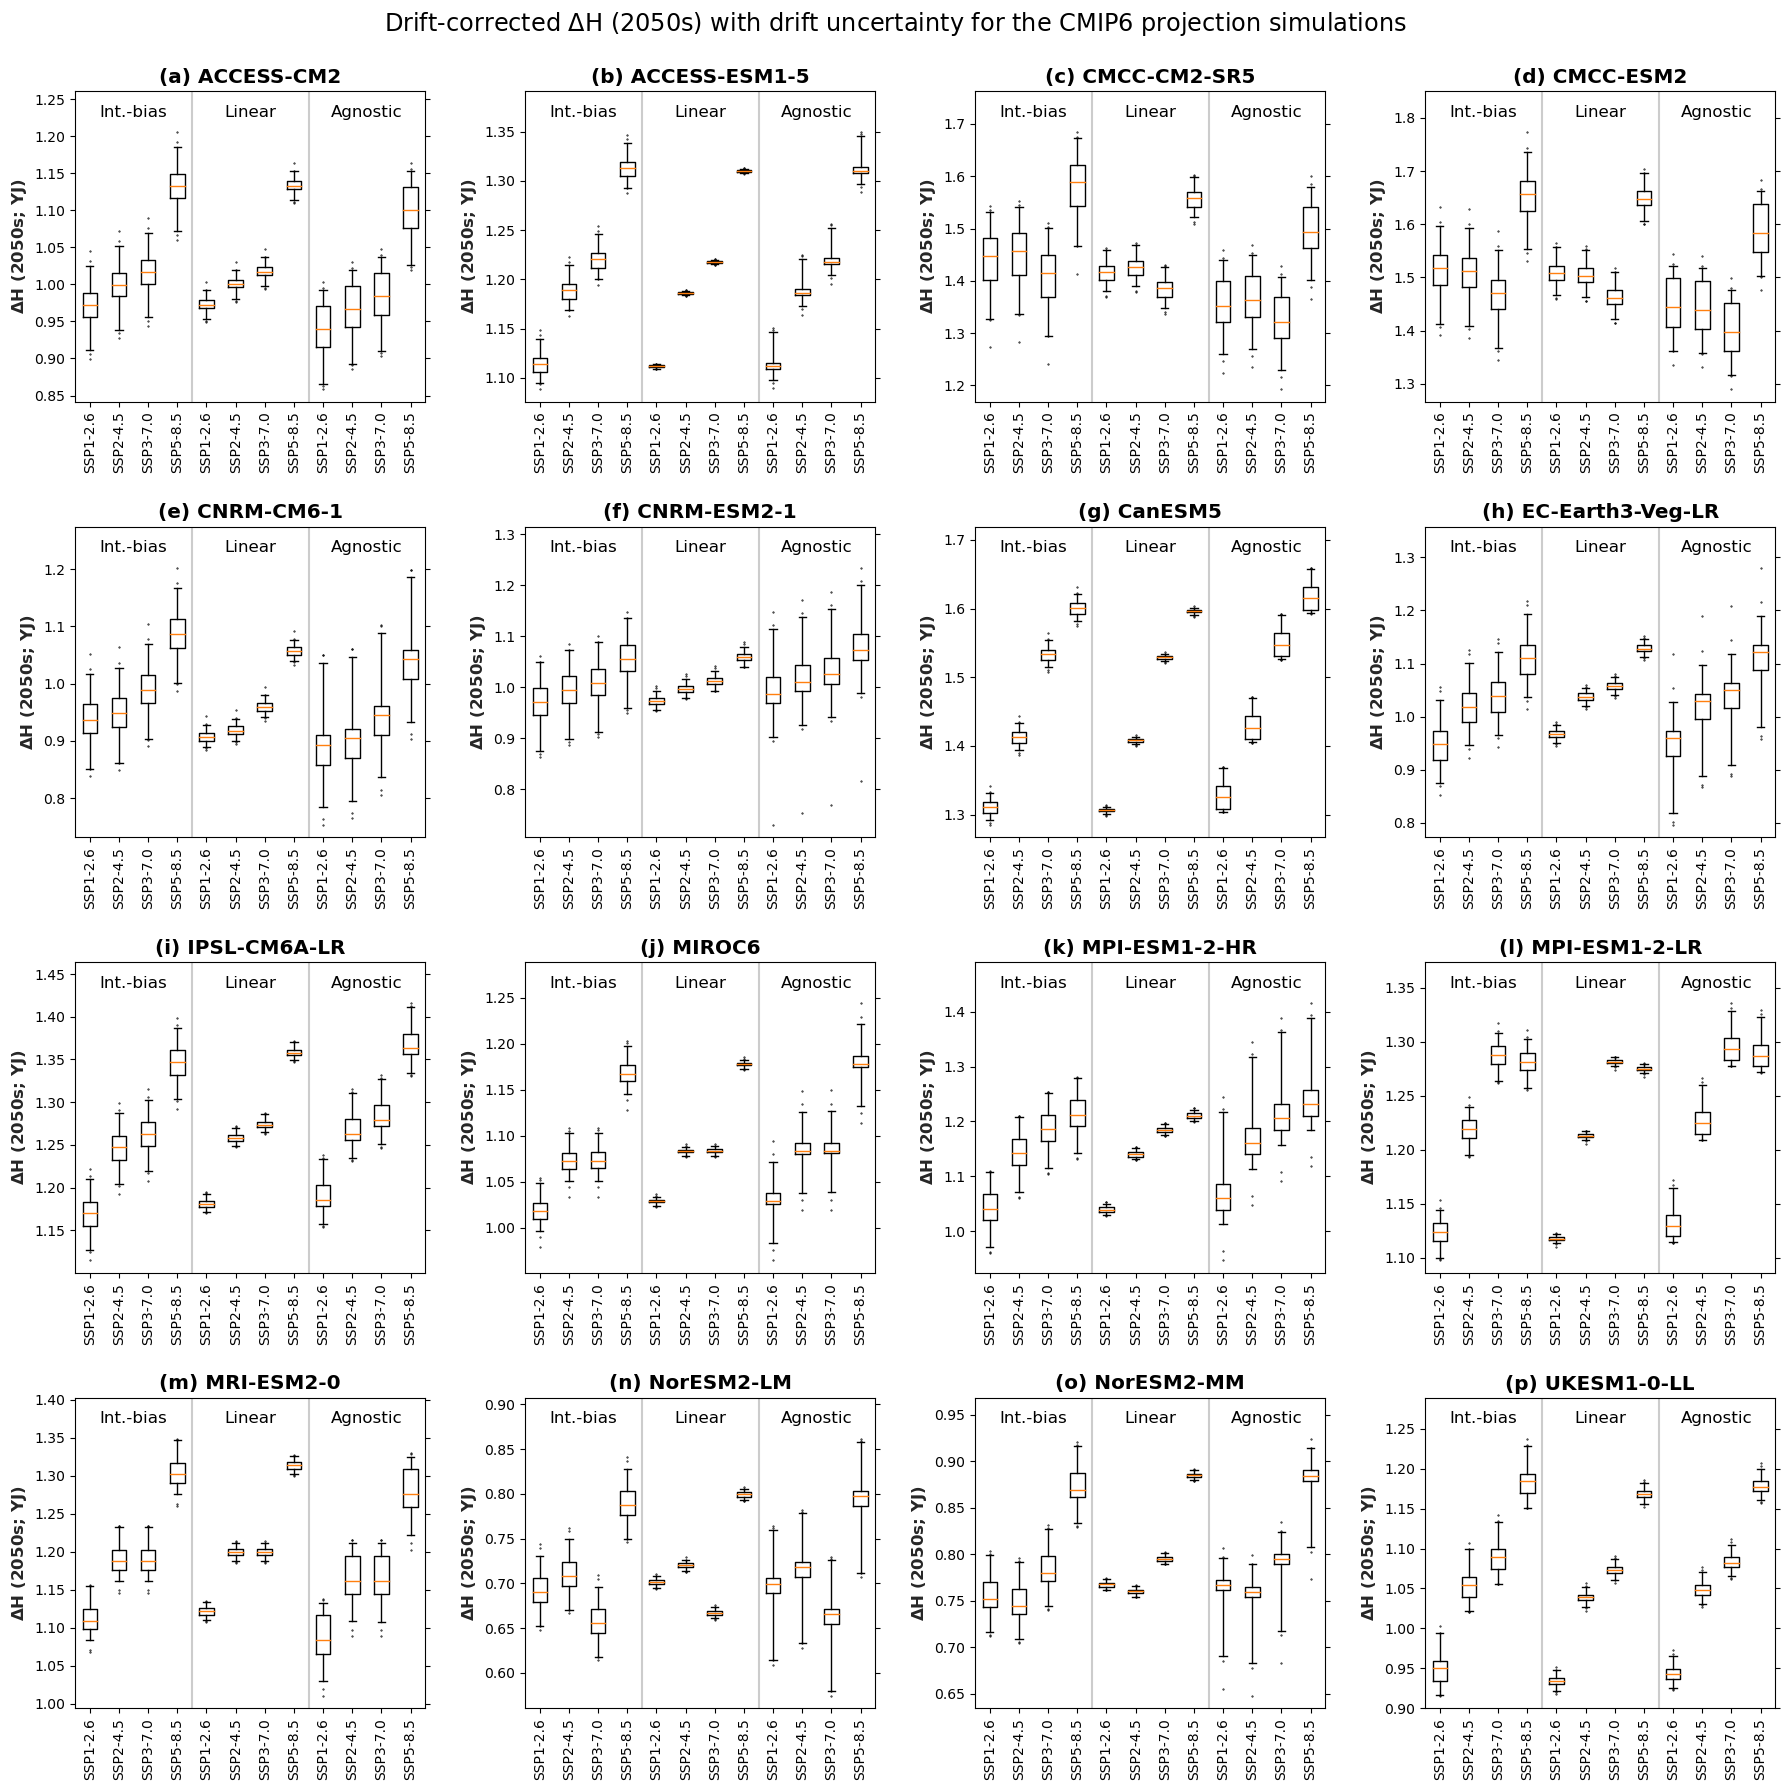

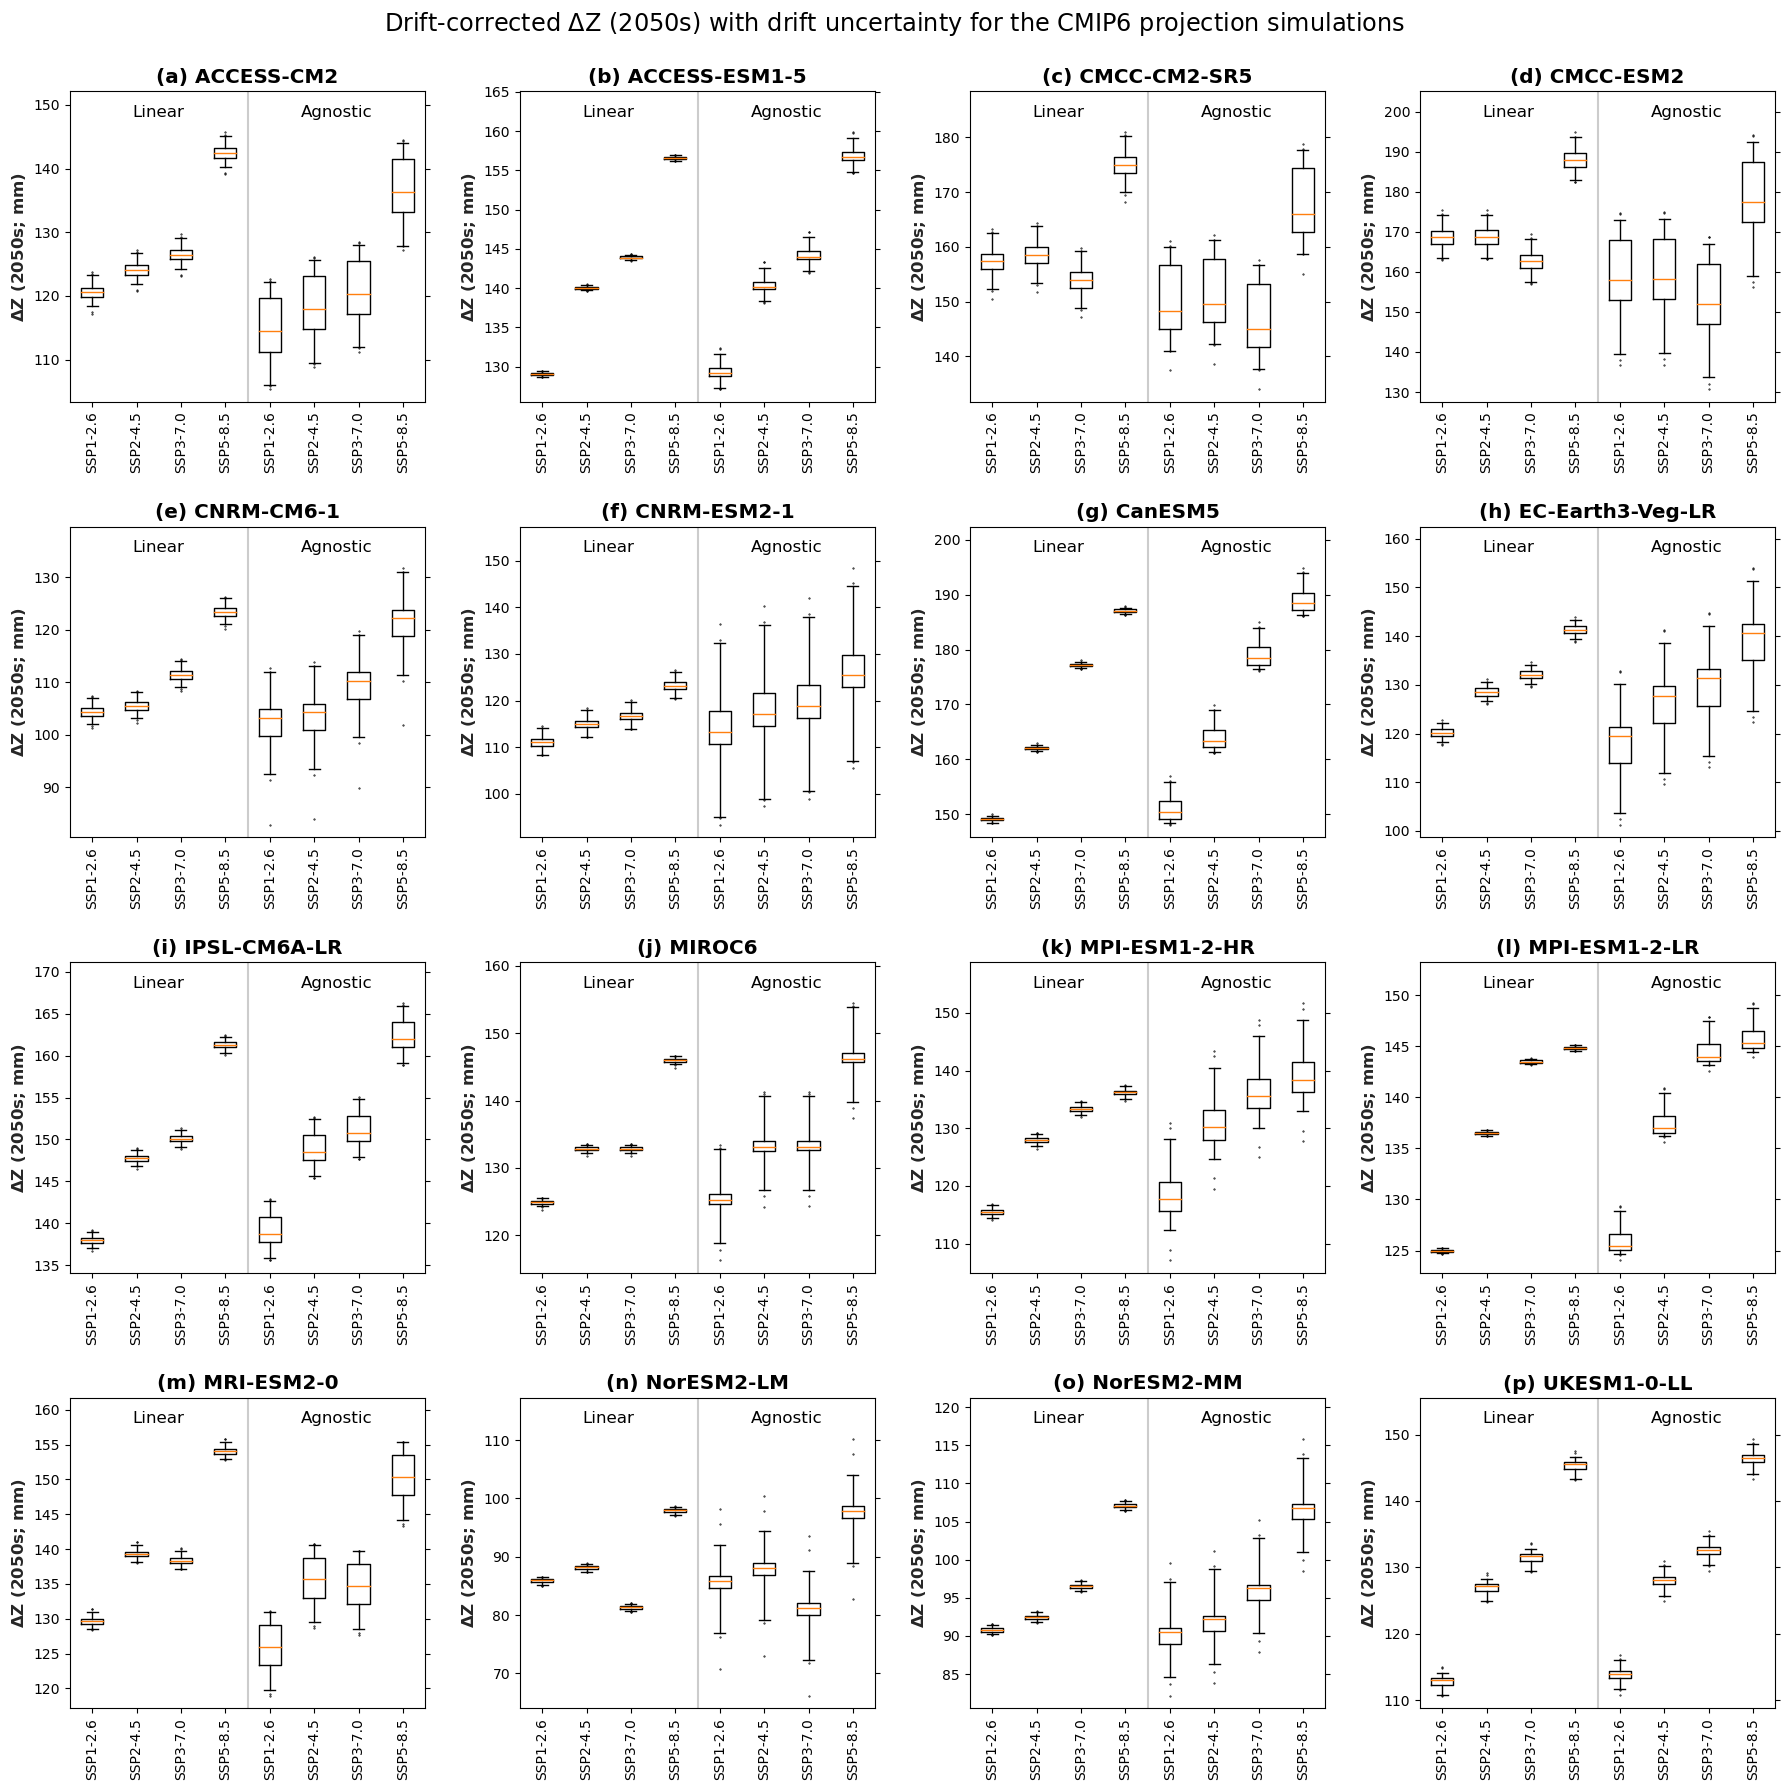

In [14]:
# Ensemble boxplots and detailed tables for E, H, and Z for 2050s
for variable in ['E', 'H', 'Z']:
    fig = d22a.ensemble_boxplots(variable=variable, target_decade='2050s')
    detailed_df = d22a.get_detailed_df(variable=variable, target_decade='2050s')
    print(f'{variable} (2050s)', detailed_df)

eta                  Drift uncertainty                 Other uncertainty         
                         Int.-bias Linear Agnostic             Model Scenario
ACCESS-CM2                   0.025  0.012    0.044               NaN    0.007
ACCESS-ESM1-5                0.014  0.001    0.015               NaN    0.013
CMCC-CM2-SR5                 0.070  0.025    0.056               NaN    0.079
CMCC-ESM2                    0.050  0.028    0.062               NaN    0.073
CNRM-CM6-1                   0.037  0.009    0.086               NaN    0.014
CNRM-ESM2-1                  0.044  0.009    0.109               NaN    0.014
CanESM5                      0.012  0.002    0.012               NaN    0.007
EC-Earth3-Veg-LR             0.054  0.014    0.155               NaN    0.007
IPSL-CM6A-LR                 0.030  0.007    0.023               NaN    0.025
MIROC6                       0.018  0.004    0.040               NaN    0.014
MPI-ESM1-2-HR                0.045  0.008    0.099          

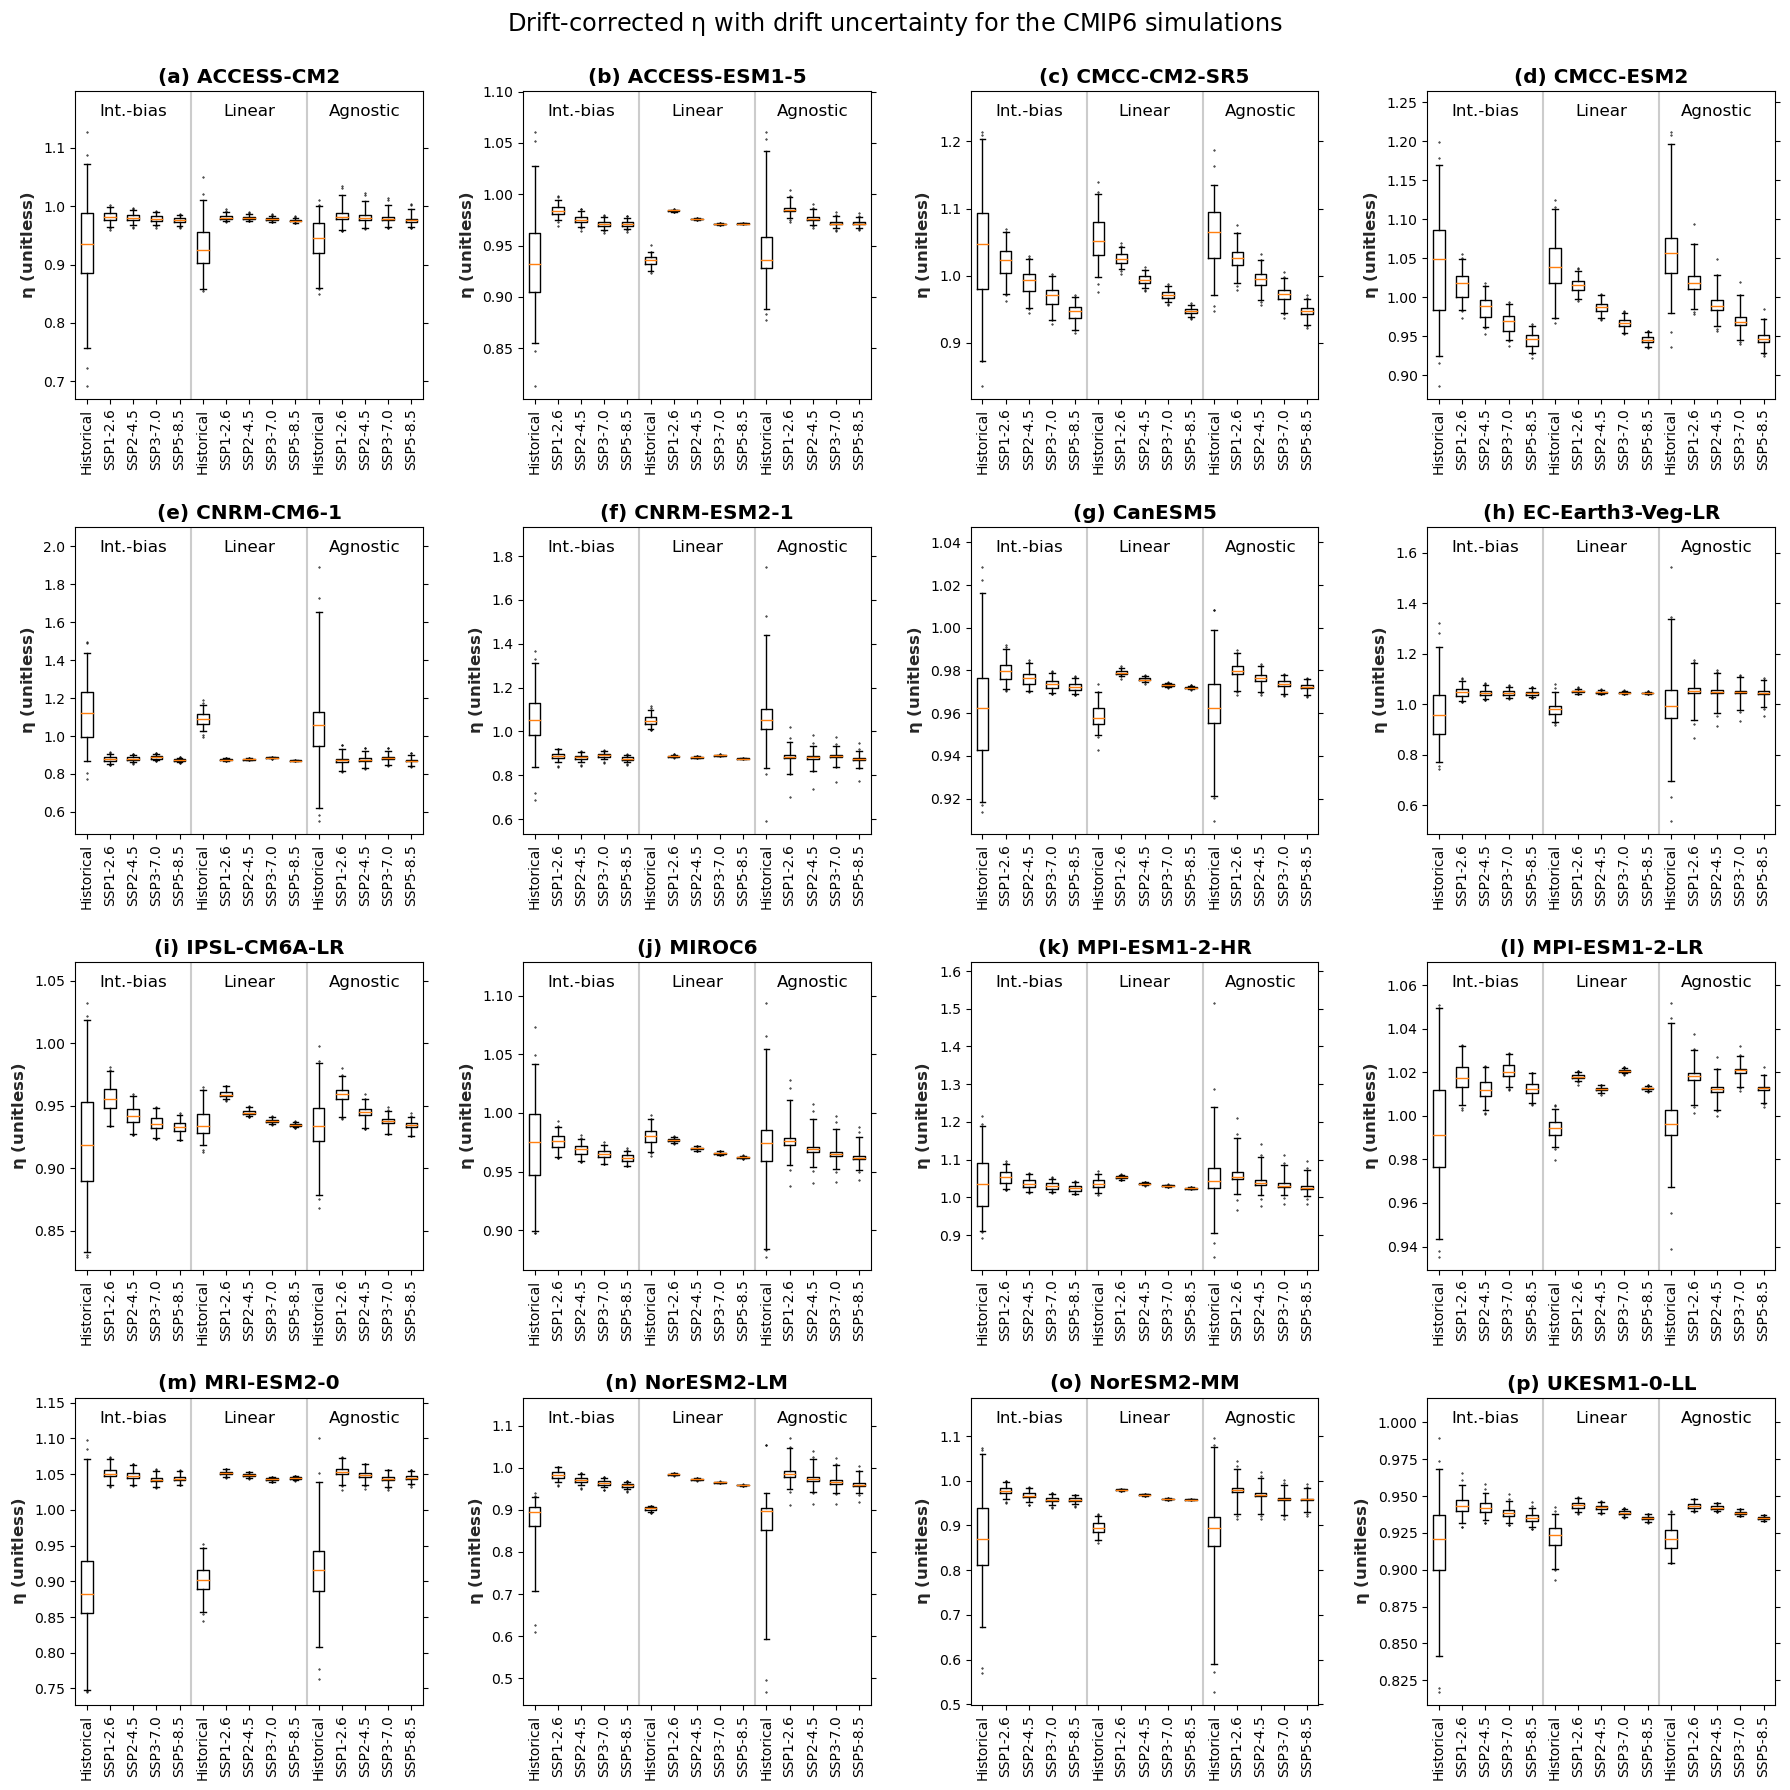

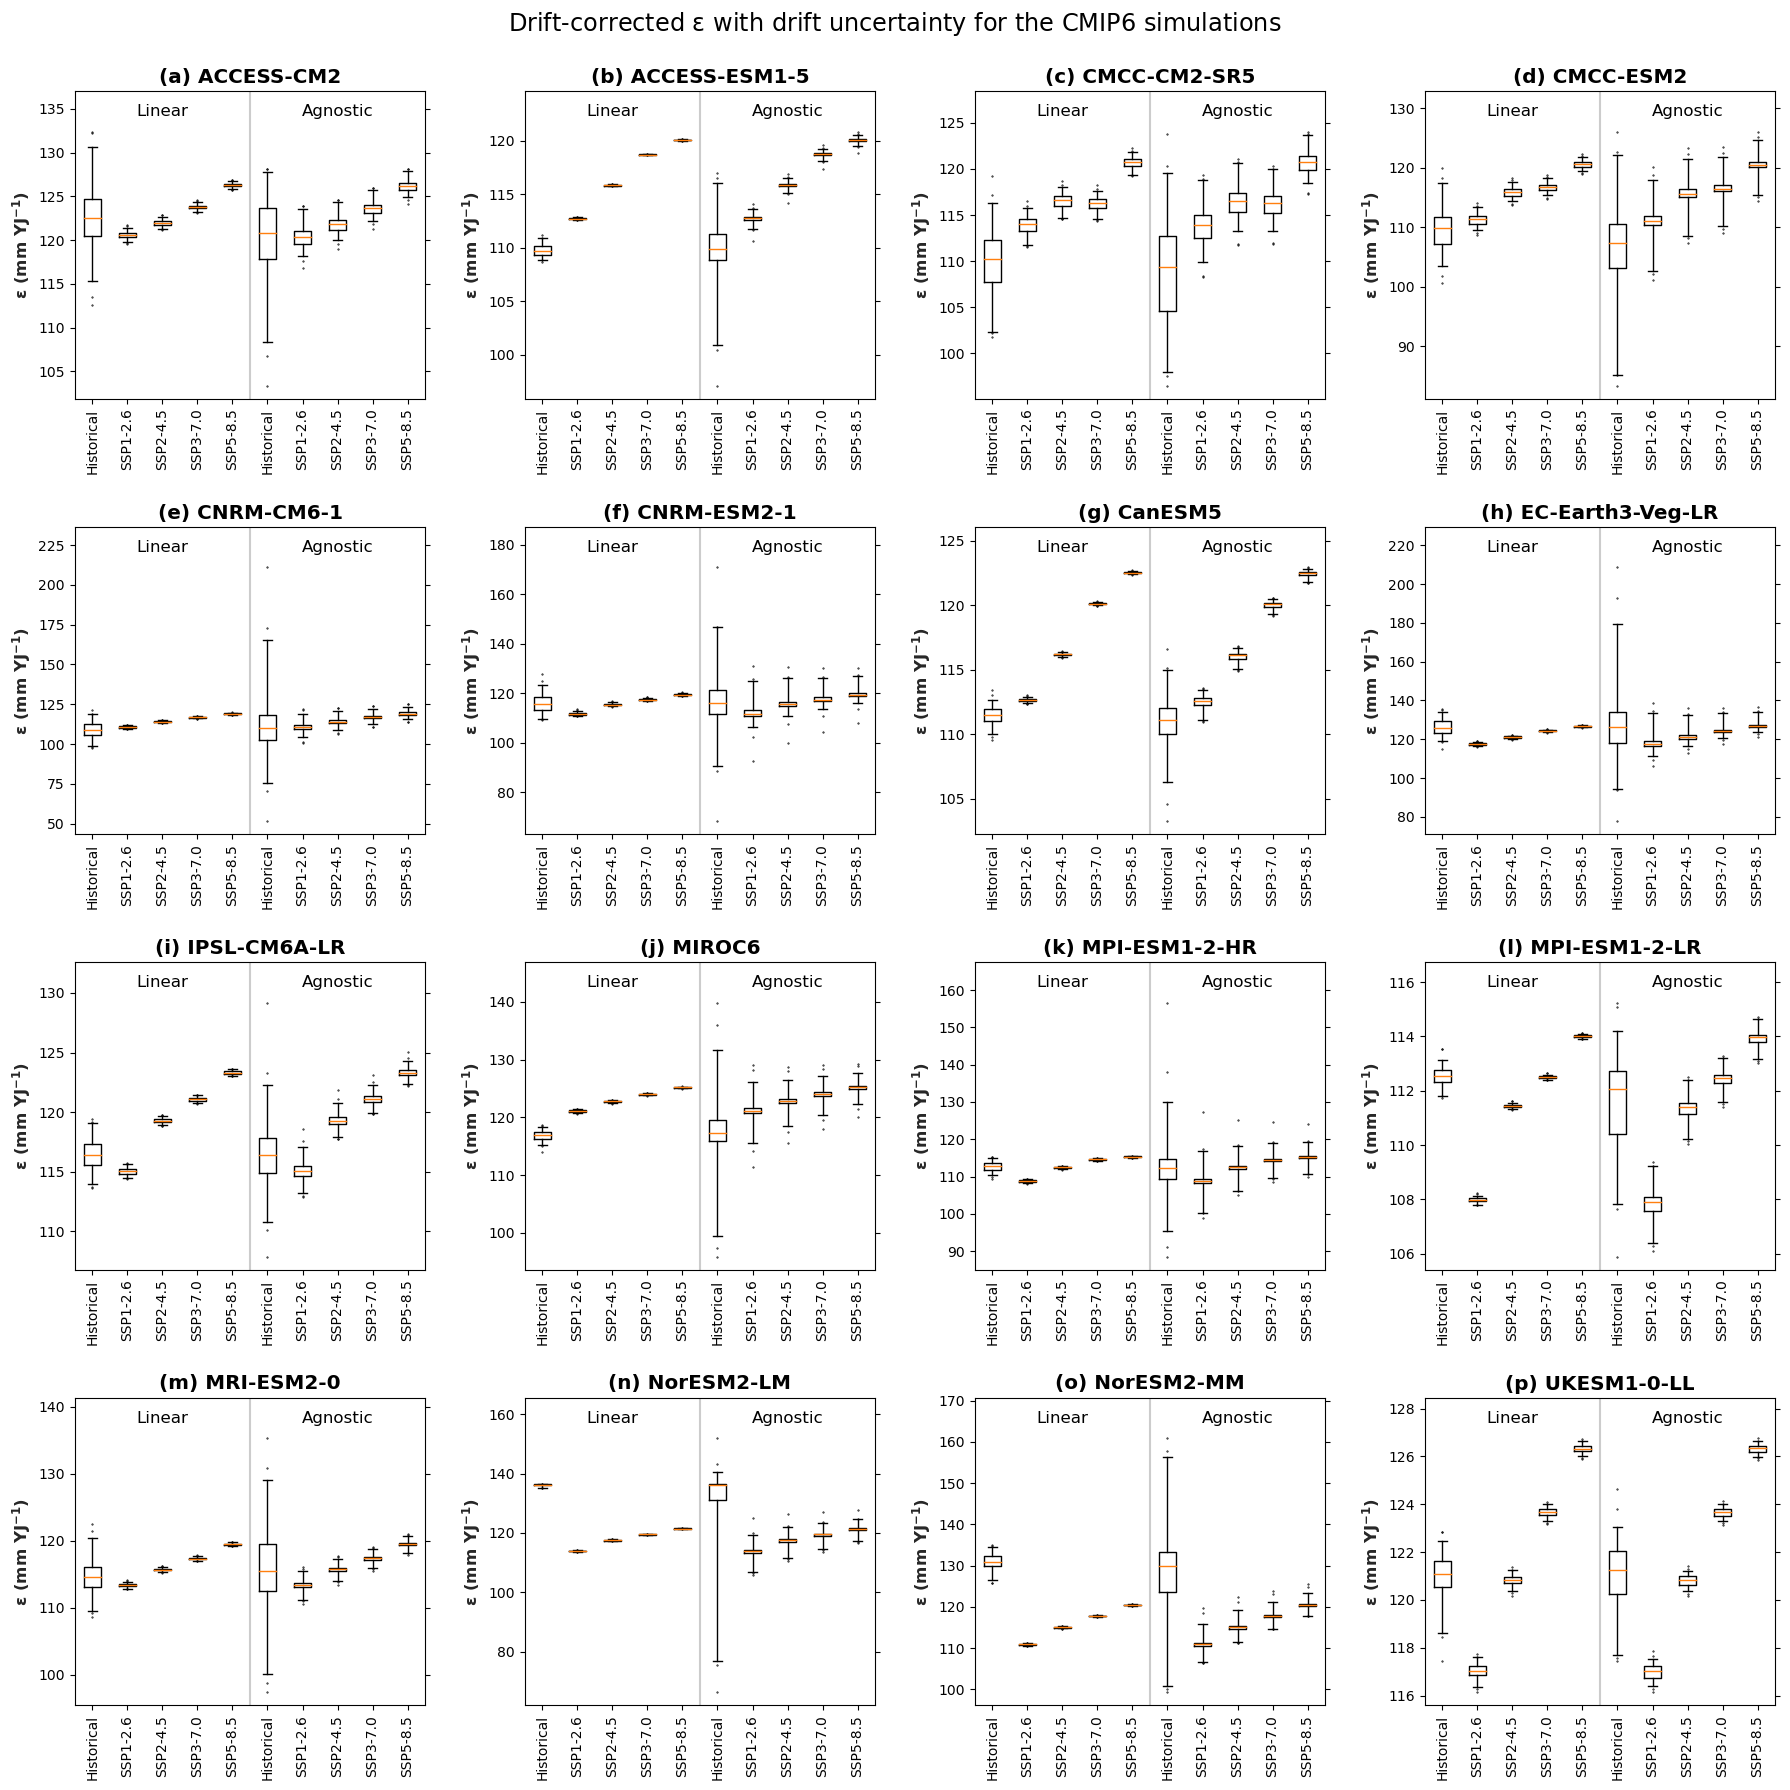

In [15]:
# Ensemble boxplots and detailed tables for eta, eps
for variable in ['eta', 'eps']:
    fig = d22a.ensemble_boxplots(variable=variable, target_decade=None)
    detailed_df = d22a.get_detailed_df(variable=variable, target_decade=None)
    print(f'{variable}', detailed_df)

In [16]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2023-07-17 11:15:06
End:       2023-07-17 11:15:43
Wall time: 37 s
